# numerically solving differential equations

**learning objectives:**
* use `DifferentialEquations.jl` (documentation [here](https://docs.juliadiffeq.org/stable/index.html)) to numerically solve (well, approximate the solution to) differential equations. 
* equip yourself with a conceptual understanding of process dynamics, in the context of our simple saline production facility, and how model inputs produce model outputs.

in chemical engineering, differential equations are used to model the time-evolution of an output variable $y=y(t)$ (could be the state of a system as opposed to, literally, an output) and how inputs $u=u(t)$ affect it. differential equations usually arise from mass or energy balances in chemical engineering. often the differential equation takes the form:
$$\frac{dy}{dt}=f(y, u)$$
with the function $f(y, u)$ characterizing the dynamics.

In [294]:
using DifferentialEquations, PyPlot

# (optional) change to a cool plot style. 
# see here for options: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("Solarize_Light2")

## saline solution production
the following differential equation is a dynamic model for a process for salt water production (see lecture notes):

\begin{equation}
    V \frac{dc}{dt} = w - qc
\end{equation}

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/salt_mixer.png" width=400>

* $V$ [L]: volume of liquid in the tank (constant as a consequence of the overflow line)
* $c$ [g/L]: concentration of salt in the solution
* $q$ [L/s]: incoming volumetric flow rate of pure water
* $w$ [g/s]: incoming gravimetric flow rate of solid salt granules

we will simulate the dynamics of this process-- i.e., we will numerically solve the ODE to arrive at the salt concentration as a function of time, $c(t)$, under two different scenarios below.

in each scenario, the volume of liquid hold-up in the tank is constant at $V=10$ L, and the incoming flow rate of water is $q=0.1$ L/s (constant, not a function of time). 

🐸 define the variables `V` and `q` as the appropriate constants in the cell below. use an inline comment `#` to reiterate what the variable represents and indicate its units.

In [295]:
V = 10 # Volume of liquid in tank, (L), constant
q = 0.1 # Incoming flowrate of water (L/s), constant

0.1

🐸 the customer demands saline solution with a salt concentration of $0.1$ g/L.
to achieve this, what should the incoming salt flow rate, $w$ [g/s], be at steady state conditions? define this as a variable `w̄` below.

In [296]:
c∞ = 0.1 # desired salt concentration, g/L
w̄ = q * c∞ # incoming salt flowrate at steady state 

0.010000000000000002

### (1) process start-up

first, we simulate process-start up. because of a prior rinse, the tank is initially full with pure water devoid of salt. then, suddenly, at time $t=0$, the constant-speed conveyor belt is turned on and $w$ [g/s] is maintained constant, at its steady state value `w̄`. essentially, this is a so-called "step" input:

$$w(t)=\begin{cases} 
      0 & t< 0 \\
        \bar{w} & t \geq 0
   \end{cases}$$

🐸 before simulating, sketch out on paper what you suspect the $c(t)$ will look like in this scenario.

🐸 use `DifferentialEquations.jl` to simulate $c(t)$, the concentration of salt in the water coming out of the process, in response to this step input, for $t\in[0, 10]$ minutes. 
* plot $c(t)$ for the same time span, from start-up ($t=0$) to $t=10$ minutes. 
* on the same panel, also plot a black, horizontal, dashed line at $c_\infty=0.1$ g/L to confirm that the limiting value of $c(t)$ corresponds to the concentration that the customer desires. (hint: try `axhline(y=0.1, color="black", linestyle="--")` for a horizontal line).

🐸 did the concentration profile match your expectations? why or why not?

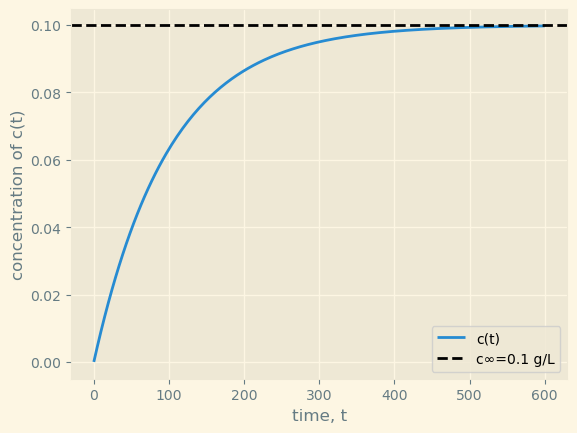

PyObject <matplotlib.legend.Legend object at 0x0000000068C5A430>

In [297]:
#using DifferentialEquations
f(c, p, t)= (w̄ - q*c) / V #RHS of ODS, dc/dt = f(c, p, t)
c₀ = 0.0 #initial salt concentration, initally pure water

time_span = (0.0, 600.0) #from t = 0 to t = 600 seconds
t = (range(0.0, time_span[2], length = 250)) #make an array for time, length is to make it smooth
prob = ODEProblem(f, c₀, time_span)
c_of_t = solve(prob)

figure()
plot(t,c_of_t.(t), label="c(t)")
axhline(c∞, color="black", label="c∞=0.1 g/L", linestyle="--") 
xlabel("time, t")
ylabel("concentration of c(t)")
legend()

🐸 [**ambitious Beavers**, an after studio question]: although the customer seeks $c_\infty=0.1$ g/L, the customer will accept (buy) saline solution that is in the range $c\in[0.095, 0.105]$ g/L.
* how long does it take for the process to output saline solution that is viable to sell?
* what volume of solution is wasted (unsold), then, from the start-up phase where the salt concentration was not up to the customer's standards?

### (2) a disturbance

the process at $t=0$ initially at steady state, outputting saline solution with a salt concentration of $0.1$ g/L. 
steady state conditions are maintained until $t=25$ s. 
at this point in time, the conveyor belt loses power and shuts off. 
only at $t=100$ s does the engineer on staff address the problem and switch the conveyor belt back on to its normal speed `w̄` for the steady state condition.

🐸 this input $w=w(t)$ is a piecewise function here, also known as a rectangular pulse. sketch out what $w(t)$ looks like and write it mathematically as a piecewise function.

🐸 code-up this rectangular pulse input $w(t)$ as a `function` in Julia, `function w_pulse(t)`, that takes the time `t` as input and outputs the value of `w` at that time `t`. 
you will need to use an `if` statement. the below code cell should teach you how to write an `if` statement in Julia. change `x` to be `10` and then see what happens.

In [298]:
x = 2

if x > 5
    println("x is greater than 5!")
else
    println("x is not greater than 5.")
end

x is not greater than 5.


you might also want to use `||` for "or". here is an example. change `y` to a different value to get the output to change.

In [299]:
y = 2
(y > 10) || (y < 3)

true

In [300]:
time_span = (0.0, 600.0) #seconds make a range for time
t = range(0.0, time_span[2], length = 600) #space out time values
function w_pulse(t)
    #c₀ = 0.1 #saline salt concentration at time = 0
    if t < 25 || t > 100 #when the salt is at steady-state concentration
        w = w̄ 
    else
        w = 0 #when the salt is zero conc.
        end
    end

w_pulse (generic function with 1 method)

🐸 to be sure you coded up `w_pulse(t)` correctly, use it to plot the function $w(t)$ it represents to make sure it conforms to your expectations. it should look like a rectangular pulse!

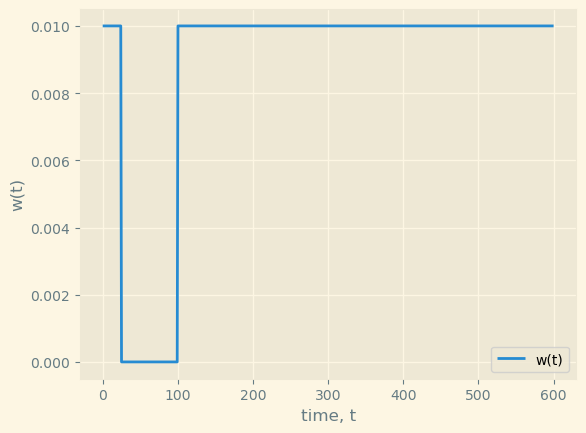

PyObject <matplotlib.legend.Legend object at 0x0000000068CF03A0>

In [301]:
figure()
plot(t,w_pulse.(t), label="w(t)")

xlabel("time, t")
ylabel("w(t)")
legend()

🐸 before you simulate, sketch out what you anticipate the output salt concentration $c(t)$ to look like in response to this rectangular pulse input $w(t)$.

🐸  use `DifferentialEquations.jl` to simulate $c(t)$, the concentration of salt in the water coming out of the process, for $t\in[0, 10]$ minutes. plot $c(t)$ for the same time span, from start-up to 10 minutes. also plot a black, vertical, dashed line at $c_\infty=0.1$ g/L as before.

**hint**: when defining the right-hand-side of the ODE for `DifferentialEquations.jl`, you will need to use the time argument, `t`, in `f(c, p, t)` and pass it into your `w_pulse(t)`.

**hint**: you may see an unphysical blip in the solution, owing to a discontinuity in the input. to alleviate this numerical artifact, pass `d_discontinuities=[100.0, 25.0]` to `ODEProblem` to make sure it handles the discontinuities in the input appropriately.

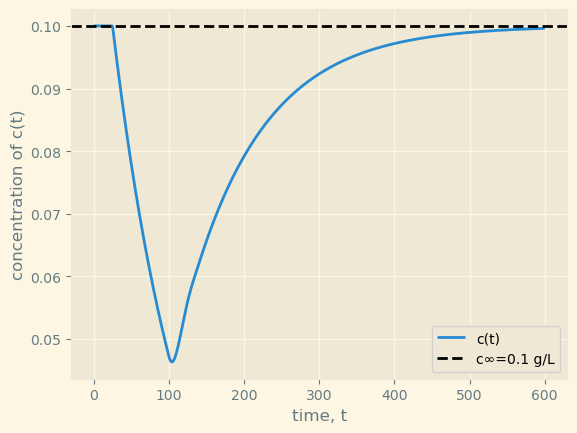

PyObject <matplotlib.legend.Legend object at 0x0000000068D174F0>

In [302]:
c∞ = 0.1 #g/L steady state salt concentration

#t = range(0.0,time_span[2],length = 600) #evenly space time values
f(c, p, t) = (w_pulse(t) - q*c) / V 

time_span = (0.0,600.0)
prob = ODEProblem(f, c∞, time_span, d_discontinuities = [100.0, 25.0])
c_t = solve(prob)

figure()
plot(t,c_t.(t), label="c(t)")
axhline(c∞, color="black", label="c∞=0.1 g/L", linestyle="--") 
xlabel("time, t")
ylabel("concentration of c(t)")
legend()

🐸 does the solution $c(t)$ conform to your expectations?

🐸 [**ambitious Beavers**, an after studio question]: although the customer seeks $c_\infty=0.1$ g/L, the customer will accept (buy) saline solution that is in the range $c\in[0.095, 0.105]$. for how long are we producing salt water that cannot be sold to the customer, owing to the conveyor belt outage?

a cool thing you can do is use `axvspan` (see [matplotlib docs](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py)) to color in your plot of $c(t)$ the region where you can't sell the salt.